# Projet IAS Voitures

## Partie 1 : Visualisation

## Prétraitement

In [1]:
#!pip install pandas
#!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing

In [2]:
cars = pd.read_csv('cars.csv')
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
#on supprime les features car inutilisables
cars = cars.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7


In [4]:
cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [5]:
#On supprime les lignes avec des valeurs nulles
cars = cars.dropna()
#on verifie si il reste des valeurs nulles
cars.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
duration_listed      0
dtype: int64

In [6]:
#gas et gasoline etant designant la même chose on transforme tous les gas en gasoline
cars['engine_fuel'] = cars['engine_fuel'].replace('gas','gasoline')

In [7]:
#exemple pour selectionner plusieurs colonnes 
X_texte = pd.DataFrame(data=cars,columns=['manufacturer_name','model_name','color','engine_fuel','engine_type','transmission','body_type','state','drivetrain','location_region'])

In [8]:
#transforme une colonne en one hot
def texte_to_hot(X_column):  
    onehotencoder = sklearn.preprocessing.OneHotEncoder(categories='auto')
    X_column = onehotencoder.fit_transform(X_column.reshape(-1,1))
    return X_column

#ajoute une colonne transformé en one hot au data frame
#on ajoute une colonne pour chaque valeur unique 
def add_oneHot(X_data,columns_name, array_name, oneHot):
    for i in range(len(array_name)):
        array_name[i] = array_name[i].replace(" ", "_")
        X_data[columns_name+"_"+array_name[i]] = oneHot[:,i] 
    return X_data

#a partir d'un data frame recupere toutes les colonnes de texte 
#pour chacunes d'elles on les transforme en one hot et ajoute au data frame
def convert_data_oneHot(X):
    colonnes_texte = X.select_dtypes(include=['object'])
    for name in colonnes_texte.columns:
        X = X.drop(columns=[name])
        unique_name = np.unique(colonnes_texte[name])
        onehot = texte_to_hot(colonnes_texte[name].values)
        X = add_oneHot(X, name, unique_name, onehot.toarray())
    return X

In [9]:
def convert_bool(X):#TODO
    colonnes_texte = X.select_dtypes(include=['object'])

In [10]:
#k est un hyper-parametre qui demande plus de test car si la cette colonne est influante on doit affiner pour 
#ne pas desequilibrer le dataset avec un model 'other_model' trop imposant
def add_model_name(X,k):
    model_names, frequency = np.unique(X['model_name'],return_counts = True)
    X['model_name'] = X['model_name'].replace(model_names[frequency < k],'other_model')
    return X

#debug print de la frequence apres la mise à jour 
#model_names, frequency = np.unique(cars['model_name'],return_counts = True)
#print(frequency)

In [12]:
#ancienne features sans utiliser les colonnes de texte
#features = cars.drop(columns=['manufacturer_name','model_name','color','engine_fuel','engine_type','transmission','body_type','state','drivetrain','location_region'])
#print(features)
features = cars.drop(columns=['price_usd'])
label = cars['price_usd']

#optionel, reste a debattre si on veut vraiment utiliser
#et si oui on devra faire un traitement supplementaire pour rassembler les models avec peut de lignes
#features = features.drop(columns=['model_name'])
#features = add_model_name(features,100);

features = convert_data_oneHot(features)

#print(features.shape)
#print les colonnes afin de verifier si on a bien mis toutes les valeurs
#for i in features.columns:
    #print(i)


odometer_value
year_produced
engine_has_gas
engine_capacity
has_warranty
is_exchangeable
number_of_photos
up_counter
duration_listed
manufacturer_name_Acura
manufacturer_name_Alfa_Romeo
manufacturer_name_Audi
manufacturer_name_BMW
manufacturer_name_Buick
manufacturer_name_Cadillac
manufacturer_name_Chery
manufacturer_name_Chevrolet
manufacturer_name_Chrysler
manufacturer_name_Citroen
manufacturer_name_Dacia
manufacturer_name_Daewoo
manufacturer_name_Dodge
manufacturer_name_Fiat
manufacturer_name_Ford
manufacturer_name_Geely
manufacturer_name_Great_Wall
manufacturer_name_Honda
manufacturer_name_Hyundai
manufacturer_name_Infiniti
manufacturer_name_Iveco
manufacturer_name_Jaguar
manufacturer_name_Jeep
manufacturer_name_Kia
manufacturer_name_LADA
manufacturer_name_Lancia
manufacturer_name_Land_Rover
manufacturer_name_Lexus
manufacturer_name_Lifan
manufacturer_name_Lincoln
manufacturer_name_Mazda
manufacturer_name_Mercedes-Benz
manufacturer_name_Mini
manufacturer_name_Mitsubishi
manufacture

In [13]:
# Regression linéaire avant la standardisation
'''

X = features.values
Y = label.values
test_ratio = 0.30
seed = 7
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=test_ratio, random_state=seed)
alpha_etoile = 0.1
monModele = sklearn.linear_model.Ridge(alpha=alpha_etoile)
monModele.fit(X_train, Y_train)
Y_train_pred = monModele.predict(X_train)
print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))

Y_test_pred = monModele.predict(X_test)
print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

xmin= min(Y_train.min(), Y_train_pred.min() )-1
xmax= max(Y_train.max(), Y_train_pred.max() )+1

fig = plt.figure(1)
plt.scatter(Y_train, Y_train_pred, marker='x', label='train')
plt.scatter(Y_test , Y_test_pred , marker='+', label='test')

# plt.scatter(??, ??, marker='x', label='train')
# plt.scatter(??, ??, marker='+', label='test')
plt.legend()
plt.xlabel('verite terrain')
plt.xlabel('prediction du modele') # xlabel ou ylabl: a vous de voir

ax = fig.add_subplot(111)

'''

'\n\nX = features.values\nY = label.values\ntest_ratio = 0.30\nseed = 7\nX_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=test_ratio, random_state=seed)\nalpha_etoile = 0.1\nmonModele = sklearn.linear_model.Ridge(alpha=alpha_etoile)\nmonModele.fit(X_train, Y_train)\nY_train_pred = monModele.predict(X_train)\nprint("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))\n\nY_test_pred = monModele.predict(X_test)\nprint("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))\n\nxmin= min(Y_train.min(), Y_train_pred.min() )-1\nxmax= max(Y_train.max(), Y_train_pred.max() )+1\n\nfig = plt.figure(1)\nplt.scatter(Y_train, Y_train_pred, marker=\'x\', label=\'train\')\nplt.scatter(Y_test , Y_test_pred , marker=\'+\', label=\'test\')\n\n# plt.scatter(??, ??, marker=\'x\', label=\'train\')\n# plt.scatter(??, ??, marker=\'+\', label=\'test\')\nplt.legend()\nplt.xlabel(\'verite terrain\')\nplt.xlabel(\'prediction du modele\

## Standardisation

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [19]:
scaler = MinMaxScaler()
# On effectue la standardisation dans une copie
cars_standard = cars.copy(deep=True)
cars_standard = cars_standard.drop(columns=['model_name'])
k = 10
#cars_standard = add_model_name(cars_standard,k);
cars_standard = convert_data_oneHot(cars_standard)

# Pour obtenir l'age
cars_standard['age'] = cars_standard['year_produced'].map(lambda x : 2020 - x )
cars_standard = cars_standard.drop(columns=['year_produced'])
# On applique fit_transform sur chaque colonne de tmp
cars_standard[cars_standard.columns] = scaler.fit_transform(cars_standard[cars_standard.columns])

In [20]:
cars_standard.head()

,odometer_value,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,manufacturer_name_Acura,...,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская_обл.,location_region_Витебская_обл.,location_region_Гомельская_обл.,location_region_Гродненская_обл.,location_region_Минская_обл.,location_region_Могилевская_обл.,age
0,0.190,0.0,0.294872,0.0,0.217984,0.0,0.094118,0.006452,0.007168,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.116883
1,0.290,0.0,0.358974,0.0,0.099982,1.0,0.129412,0.028495,0.037186,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.220779
2,0.402,0.0,0.294872,0.0,0.055981,1.0,0.035294,0.038172,0.067652,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.233766
3,0.010,0.0,0.358974,0.0,0.199964,1.0,0.094118,0.022043,0.038530,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.259740
4,0.280,0.0,0.294872,0.0,0.042663,1.0,0.152941,0.003226,0.003136,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.233766


In [21]:
features = cars_standard.drop(columns=['price_usd'])
label = cars_standard['price_usd']
X = features.values
Y = label.values

train error 0.0024552926089772805
test error 0.0031750581146319725


<ipython-input-18-8f47f17c9655>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


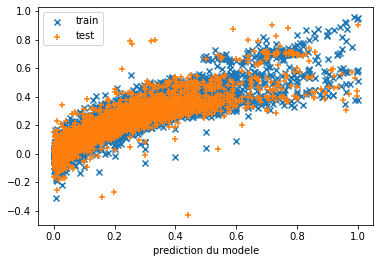

In [18]:
# Regression linéaire aprés la standardisation
test_ratio = 0.30
seed = 42
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=test_ratio, random_state=seed)
alpha_etoile = 0.1
monModele = sklearn.linear_model.Ridge(alpha=alpha_etoile)
monModele.fit(X_train, Y_train)
Y_train_pred = monModele.predict(X_train)
print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))

Y_test_pred = monModele.predict(X_test)
print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

xmin= min(Y_train.min(), Y_train_pred.min() )-1
xmax= max(Y_train.max(), Y_train_pred.max() )+1

fig = plt.figure(1)
plt.scatter(Y_train, Y_train_pred, marker='x', label='train')
plt.scatter(Y_test , Y_test_pred , marker='+', label='test')

# plt.scatter(??, ??, marker='x', label='train')
# plt.scatter(??, ??, marker='+', label='test')
plt.legend()
plt.xlabel('verite terrain')
plt.xlabel('prediction du modele') # xlabel ou ylabl: a vous de voir

ax = fig.add_subplot(111)

## RandomForest

In [22]:
#je pop au lieu de selectionner les colonnes directement car on conserve le format pandas
Y = cars_standard.pop('price_usd')
X = cars_standard
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#les params sont à regler pour le meilleur resultat
rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [1,5,1]
              , "min_samples_split" : [1,5,1]
              , "max_depth": [10]
              , "n_estimators": [100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/alexandre/Documents/python/IAS/jupyter/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.88723717        nan        nan 0.88365483        nan
        nan 0.88746637        nan]
  warnings.warn(


In [24]:
print(gs.best_score_)
print(gs.best_params_)

0.8874663723294383
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [25]:
#on recommence avec les meilleurs params trouvées 
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, Y_train)

print('Score: %.2f' % forest.score(X_test, Y_test))

Score: 0.89


In [26]:
#on change les options d'affichage de pandas
#permet de print autant de ligne que l'on veut
pd.set_option('display.max_rows', None)
#format de float plus lisible : 123456.e-1 => 0.12345
pd.options.display.float_format = '{:.5f}'.format

In [27]:
important_features = pd.Series(data=forest.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
#print les colonnes les plus influentes 
#print(important_features)

age                                0.66705
drivetrain_front                   0.11956
engine_capacity                    0.09884
odometer_value                     0.03100
transmission_mechanical            0.00713
body_type_minibus                  0.00588
transmission_automatic             0.00559
number_of_photos                   0.00514
duration_listed                    0.00468
engine_fuel_gasoline               0.00384
up_counter                         0.00375
manufacturer_name_Toyota           0.00306
body_type_suv                      0.00296
manufacturer_name_Mercedes-Benz    0.00282
manufacturer_name_Volkswagen       0.00248
manufacturer_name_Audi             0.00218
body_type_sedan                    0.00215
manufacturer_name_Renault          0.00209
engine_fuel_diesel                 0.00179
engine_type_diesel                 0.00167
manufacturer_name_BMW              0.00151
engine_type_gasoline               0.00140
body_type_minivan                  0.00132
drivetrain_

## Analyse features

Resultat random forest avec en param

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [1,5,1]
              , "min_samples_split" : [1,5,1]
              , "max_depth": [10]
              , "n_estimators": [100]}
              
Pour les deux versions la precision/score est de 0.89

Sans les modeles de voitures :

| Colonne | Influence |
| :- | :- |
age|**6705**|
drivetrain_front|**0.11956**|
engine_capacity|**0.09884**|
odometer_value|**0.03100**|
transmission_mechanical|**0.00713**|
body_type_minibus|**0.00588**|
transmission_automatic|**0.00559**|
number_of_photos|**0.00514**|
duration_listed|**0.00468**|
engine_fuel_gasoline|**0.00384**|
up_counter|**0.00375**|
manufacturer_name_Toyota|**0.00306**|
body_type_suv|**0.00296**|
manufacturer_name_Mercedes-Benz|**0.00282**|
manufacturer_name_Volkswagen|**0.00248**|
manufacturer_name_Audi|**0.00218**|
body_type_sedan|**0.00215**|
manufacturer_name_Renault|**0.00209**|
engine_fuel_diesel|**0.00179**|
engine_type_diesel|**0.00167**|
manufacturer_name_BMW|**0.00151**|
engine_type_gasoline|**0.00140**|
body_type_minivan|**0.00132**|
drivetrain_all|**0.00117**|
state_new|**0.00115**|
manufacturer_name_Land_Rover|**0.00109**|
manufacturer_name_ВАЗ|**0.00104**|
manufacturer_name_Nissan|**0.00101**|

Avec les modeles de voitures (avec k = 10) :

| Colonne | Influence |
| :- | :- |
age|**0.66650**|
drivetrain_front|**0.12405**|
engine_capacity|**0.08977**|
odometer_value|**0.02913**|
transmission_mechanical|**0.00652**|
model_name_other_model|**0.00548**|
transmission_automatic|**0.00542**|
body_type_minibus|**0.00420**|
number_of_photos|**0.00418**|
duration_listed|**0.00390**|
engine_fuel_gasoline|**0.00353**|
up_counter|**0.00338**|
model_name_Land_Cruiser|**0.00327**|
model_name_Rapid|**0.00281**|
body_type_suv|**0.00227**|
manufacturer_name_Volkswagen|**0.00190**|
manufacturer_name_Audi|**0.00182**|
manufacturer_name_Mercedes-Benz|**0.00170**|
engine_type_gasoline|**0.00162**|
model_name_T5_Multivan|**0.00158**|
engine_type_diesel|**0.00151**|
body_type_sedan|**0.00145**|
state_new|**0.00138**|
engine_fuel_diesel|**0.00119**|
manufacturer_name_BMW|**0.00108**|
manufacturer_name_Renault|**0.00100**|

les features les plus influentes, on remarque que other_model est dans le top avec un k = 10, c'est donc un paramettre à regler avec prudance, on economise ~400 colonnes avec k = 10.


In [ ]:
#j'ai test des trucs avec markdown c'est à completer